In [25]:
import pandas as pd
import numpy as np


In [26]:
df=pd.read_csv('/content/customer_churn.csv')

In [27]:
df.head()

,RowNumber,CustomerId,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember
0,1,15634602,619,2,0.00,1,1
1,2,15647311,608,1,83807.86,0,1
2,3,15619304,502,8,159660.80,1,0
3,4,15701354,699,1,0.00,0,0
4,5,15737888,850,2,125510.82,1,1


In [28]:
df.shape

(10000, 7)

In [29]:
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Tenure', 'Balance',
       'HasCrCard', 'IsActiveMember'],
      dtype='object')

In [30]:
df.dtypes

RowNumber           int64
CustomerId          int64
CreditScore         int64
Tenure              int64
Balance           float64
HasCrCard           int64
IsActiveMember      int64
dtype: object

In [31]:
df.isnull().sum()

RowNumber         0
CustomerId        0
CreditScore       0
Tenure            0
Balance           0
HasCrCard         0
IsActiveMember    0
dtype: int64

In [32]:
df.describe()

,RowNumber,CustomerId,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,5.012800,76485.889288,0.70550,0.515100
std,2886.89568,7.193619e+04,96.653299,2.892174,62397.405202,0.45584,0.499797
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,0.00000,0.000000
25%,2500.75000,1.562853e+07,584.000000,3.000000,0.000000,0.00000,0.000000
50%,5000.50000,1.569074e+07,652.000000,5.000000,97198.540000,1.00000,1.000000
75%,7500.25000,1.575323e+07,718.000000,7.000000,127644.240000,1.00000,1.000000
max,10000.00000,1.581569e+07,850.000000,10.000000,250898.090000,1.00000,1.000000


In [33]:
df.head()

,RowNumber,CustomerId,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember
0,1,15634602,619,2,0.00,1,1
1,2,15647311,608,1,83807.86,0,1
2,3,15619304,502,8,159660.80,1,0
3,4,15701354,699,1,0.00,0,0
4,5,15737888,850,2,125510.82,1,1


In [36]:
final_dataset = df[['CreditScore', 'Tenure', 'Balance',  'HasCrCard', 'IsActiveMember']]

In [37]:
final_dataset.head()

,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember
0,619,2,0.00,1,1
1,608,1,83807.86,0,1
2,502,8,159660.80,1,0
3,699,1,0.00,0,0
4,850,2,125510.82,1,1


In [39]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [40]:
final_dataset.head()

,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember
0,619,2,0.00,1,1
1,608,1,83807.86,0,1
2,502,8,159660.80,1,0
3,699,1,0.00,0,0
4,850,2,125510.82,1,1


In [2]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

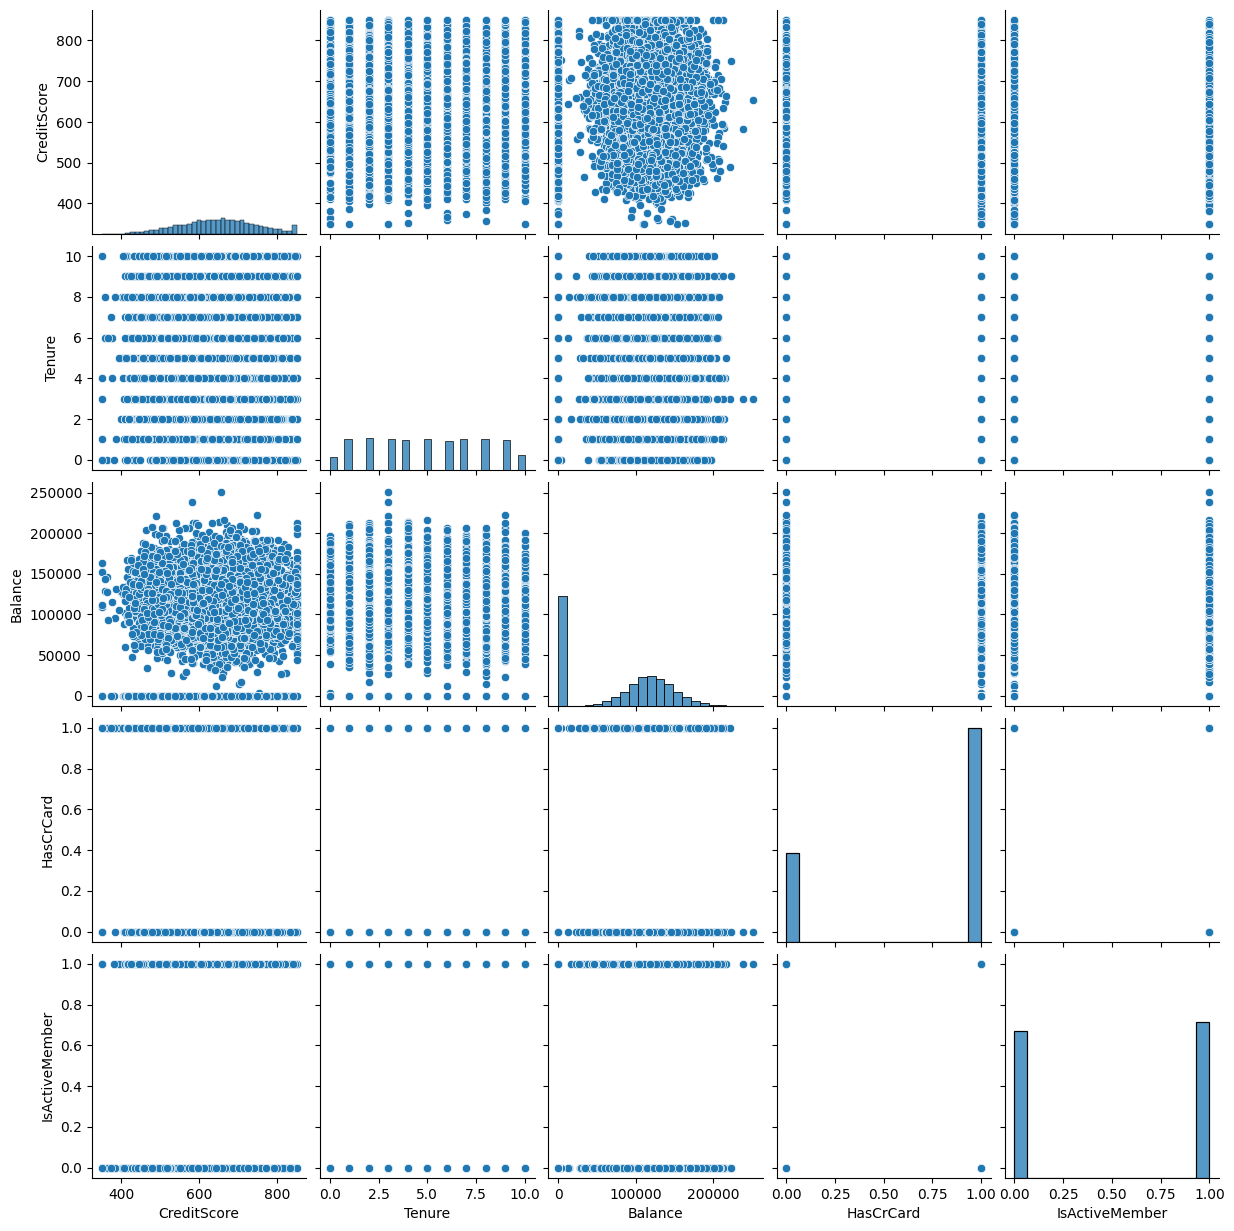

In [42]:
sns.pairplot(final_dataset)

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

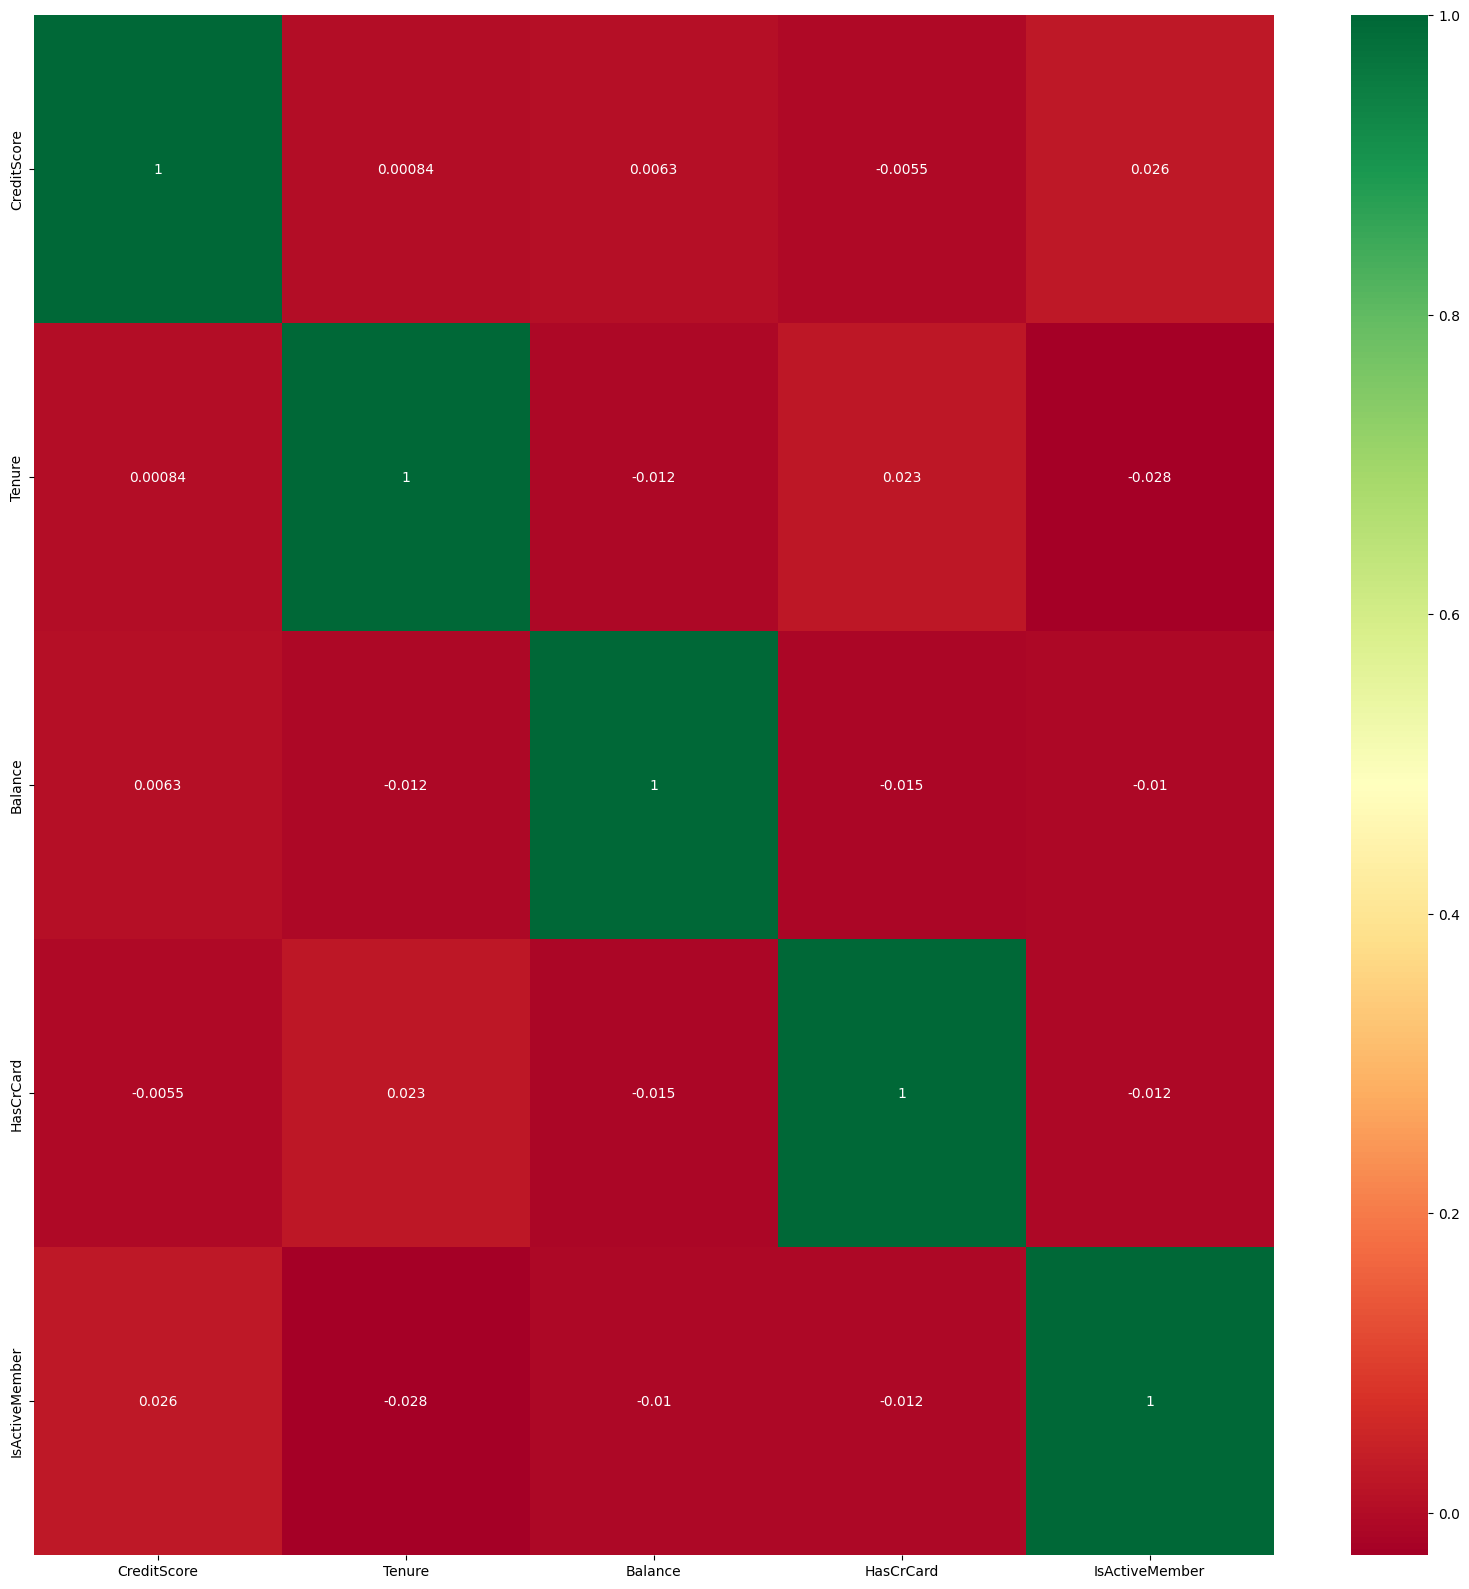

In [44]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [45]:
final_dataset.head()

,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember
0,619,2,0.00,1,1
1,608,1,83807.86,0,1
2,502,8,159660.80,1,0
3,699,1,0.00,0,0
4,850,2,125510.82,1,1


In [46]:
print(final_dataset.head())  # Print the first few rows of the DataFrame
print(final_dataset.shape)    # Print the shape of the DataFrame
print(final_dataset.columns)  # Print t


   CreditScore  Tenure    Balance  HasCrCard  IsActiveMember
0          619       2       0.00          1               1
1          608       1   83807.86          0               1
2          502       8  159660.80          1               0
3          699       1       0.00          0               0
4          850       2  125510.82          1               1
(10000, 5)
Index(['CreditScore', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember'], dtype='object')


In [47]:
X = final_dataset[['CreditScore', 'Tenure', 'HasCrCard','IsActiveMember']]
y = final_dataset['Balance']


In [48]:
X.head()

,CreditScore,Tenure,HasCrCard,IsActiveMember
0,619,2,1,1
1,608,1,0,1
2,502,8,1,0
3,699,1,0,0
4,850,2,1,1


In [49]:
y

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

In [50]:
# Splitting the dataset into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [51]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
print(X_train)

[[ 0.35649971  0.34567966  0.64920267  0.97481699]
 [-0.20389777 -0.3483691   0.64920267  0.97481699]
 [-0.96147213 -0.69539349  0.64920267 -1.02583358]
 ...
 [ 0.86500853 -1.38944225 -1.54035103 -1.02583358]
 [ 0.15932282  1.03972843  0.64920267 -1.02583358]
 [ 0.47065475 -1.38944225  0.64920267  0.97481699]]


In [53]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [54]:
print(model.feature_importances_)

[0.90276803 0.08888899 0.00259934 0.00574363]


# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [56]:
y_pred = rf.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print MAE and MSE
print("MAE:", mae)
print("MSE:", mse)





MAE: 59354.95457181158
MSE: 4934413003.747156


In [62]:
# pickling the Model
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(rf, file)

In [63]:
from google.colab import files

# Assuming you have a pickle file named 'model.pkl' that you want to download
files.download('Customer_Churn_Prediction.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>